In [ ]:
# Classification Problem on Bank Marketing Data Set 

## Abstract
---
 - The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)

## Source
---
 - [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Data
---
 - **Online Source:** UCI Machine Learning Repository
 - **Number of Instances:** 45211
 - **Number of Attributes:** 21
 - **Data Set Characteristics:** Multivariate
 - **Area:** Business
 - **Missing Values?:** N/A
 - **Associated Tasks:** Classification
 - **High Level Summary:** The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

## Attribute Description
---

### Bank Client Data:
 - age (numeric)
 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
 - default: has credit in default? (categorical: 'no','yes','unknown')
 - housing: has housing loan? (categorical: 'no','yes','unknown')
 - loan: has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:
 - contact: contact communication type (categorical: 'cellular','telephone') 
 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
 - duration: last contact duration, in seconds (numeric)

### Other Attributes:
 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999  means client was not previously contacted)
 - previous: number of contacts performed before this campaign and for this client (numeric)
 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Social and Economic Context Attributes
 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
 - cons.price.idx: consumer price index - monthly indicator (numeric) 
 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
 - euribor3m: euribor 3 month rate - daily indicator (numeric)
 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (target):
 - y: has the client subscribed a term deposit? (binary: 'yes','no')

In [47]:
# importing related libraries and setting workind directory

import pandas as pd
import os
import string
from sklearn.model_selection import KFold
import numpy as np
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

import seaborn as sns
sns.set_style("whitegrid")

matplotlib.style.use('ggplot')
# use the code below to make sure plot is shown in Notebook
%matplotlib inline 

os.chdir(r'C:\Users\Varni\Desktop\Course info\Python\bank')

In [48]:
# Load the training data in pandas dataframe

train_full = pd.read_csv('bank-additional-full.csv',sep=',')
train_full.head()
del train_full['Year']

In [49]:
# Check for missing values

train_full.isnull().sum()

# The data doesn't have any missing values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [50]:
# Lets see the mean, median and quantile information of numerical features
cols=['age','duration','campaign','pdays','previous']


a=train_full[['nr.employed',
 'leuribor3m',
 'emp.var.rate',
 
 'campaign',
 'cons.price.idx',
 
 'duration',
 
 'age',
 'cons.conf.idx',
 
 'pdays',
 ]]
b=a.describe()
b.round(1)

KeyError: "['leuribor3m'] not in index"

In [ ]:
numcols

In [ ]:
# Check for class imbalance

train_full.groupby('y').size()/len(train_full.y)

# Nearly 90% of the data belongs to class 'no' there is clearly a class imbalance issue
# To address the class imbalance we will resample the data to get a stratified sample with 50-50 split in target
# While running the model on full data we will track performance metrics other than accuracy such as F1 Score,
# Precision rate, and recall rate which are much better measures of model when class imbalance exists

In [51]:
# check if there are columns that have only one value

cname=list()
for column in train_full:
    y=pd.Series(train_full[column].unique())
    if (y.isnull().sum() > 0):
        if y.shape[0]==2:
            cname.append(column) 
    else:
        if y.shape[0]==1:
            cname.append(column)
print(cname)

# check if there are columns that have only one value for 90% of the observations

cname=list()
cnt=train_full.shape[0]
for column in train_full:
    y=train_full[column].value_counts().reset_index().rename(columns={'index': column, column: 'freq'})
    y['flag']=np.where(y.freq/cnt>0.90,1,0);
    if y['flag'].sum()>0:
        cname.append(column)
print(cname)

# pdays variable consists of one value '999' for more than 90% of the data, which means that more than 90%
# of the customers were not contacted previously

[]
['pdays']


In [52]:
# Some basic feature engineering
train_full['label']=np.where(train_full['y']=='yes',1,0)

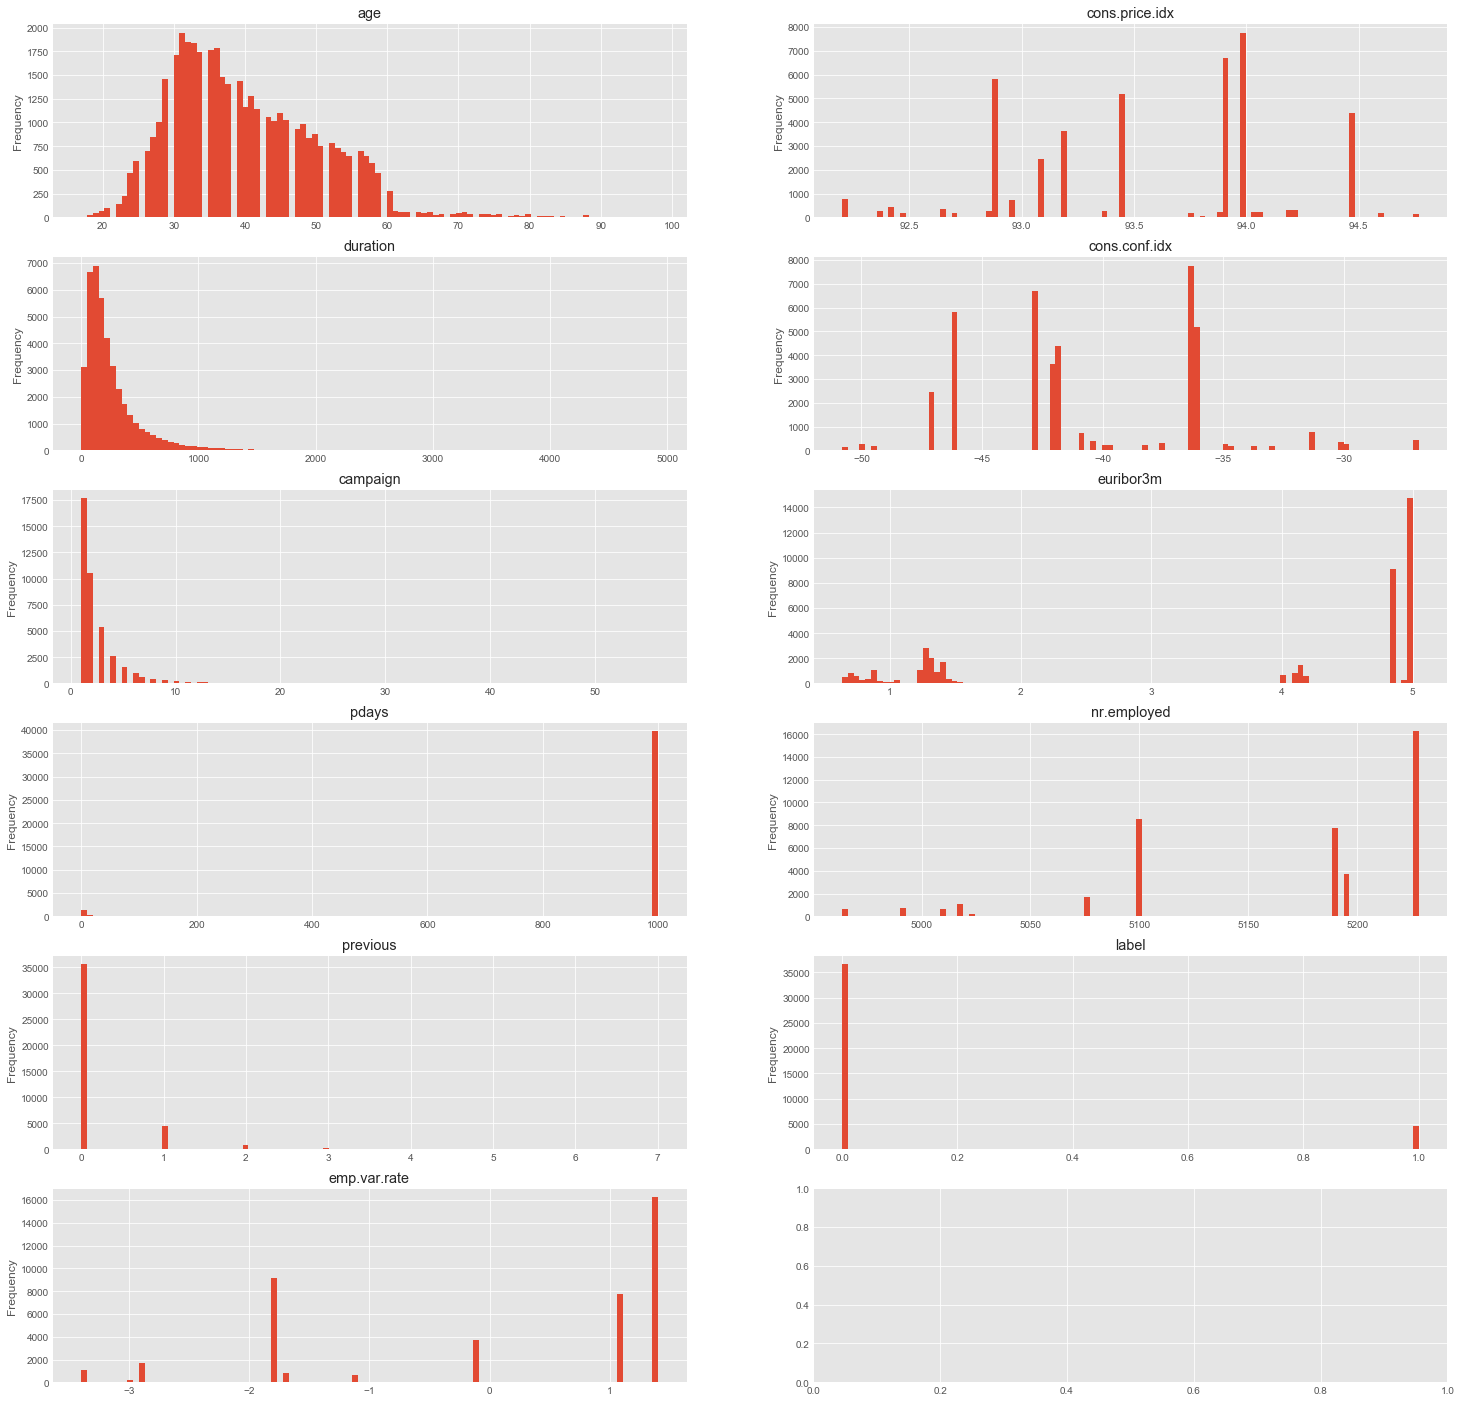

In [53]:
# Lets check the distribution of the variables and relationship with the target variable

numcols=train_full._get_numeric_data().columns.values.tolist()
fig, axes = plt.subplots(nrows=round(len(numcols)/2), ncols=2,figsize=(25,25))
i=0
j=0
for item in numcols:
    train_full[item].plot.hist(ax=axes[i,j],bins=100); axes[i,j].set_title(item);
    if i == round(len(numcols)/2)-1: 
        i=0
        j=1
    else: i=i+1

# Distribution of duration, campaign should be transformed to log
# Create buckets for pdays, social and economic factors
# create flag for previous

In [ ]:
# Lets check the relationship between the numeric variables and target variable

# Define a function for a bar plot

def barplot(df, x , y, title, p , q):
    l=[x,y]
    means = df[l].groupby(x).agg([np.mean, np.std])
    means.columns = means.columns.droplevel()
    means['mean'].plot.bar(title=title,ax=axes[p,q],fontsize= 20) 
    
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,15))
sns.boxplot(x="y", y="age", data=train_full,ax=axes[0,0])
barplot(train_full,'job','label', "Mean y by job",1,0)
barplot(train_full,'marital','label', "Mean y by marital",0,1)
barplot(train_full,'education','label', "Mean y by education",1,1)

fig.tight_layout()

# Age seems redundant
# People not working like student, retired most likely to say yes
# Single people more likely for a yes compared to divorced or married
# Iliterate, unkown more likely for a yes

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,15))
barplot(train_full,'default','label', "Mean y by default",0,0)
barplot(train_full,'housing','label', "Mean y by housing",1,0)
barplot(train_full,'loan','label', "Mean y by loan",0,1)
sns.boxplot(x="y", y="duration", data=train_full,ax=axes[1,1])


# Peope with no default more likely for yes
# Loan and Housing seem to have no impact
# more the duration more chances of yes

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,15))
barplot(train_full,'contact','label', "Mean y by contact",0,0)
sns.boxplot(x="y", y="campaign", data=train_full,ax=axes[1,0])
barplot(train_full,'month','label', "Mean y by month",0,1)
barplot(train_full,'day_of_week','label', "Mean y by day_of_week",1,1)

# Cellular more chance of yes
# More success in specific months and mid weekdays
# More success in fewer campaign contacts

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,15))
sns.boxplot(x="y", y="pdays", data=train_full[train_full.pdays!=999],ax=axes[0,0]).set_title('Days since previous contact')
sns.boxplot(x="y", y="previous", data=train_full,ax=axes[1,0]).set_title('Number of previous contacts')
barplot(train_full,'poutcome','label', "Mean y by Previous Campaign Outcome",0,1)
barplot(train_full,'y','emp.var.rate', "Mean Employee Variation Rate by y",1,1)

fig.tight_layout()

# More chances of success if success in previous campaigns
# Lesser Pdays more success
# higher previous higher success
# emp.var.rate is useful

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,15))
barplot(train_full,'y','cons.price.idx', "Mean cons.price.idx by y",0,0)
barplot(train_full,'y','cons.conf.idx', "Mean cons.conf.idx by y",1,0)
barplot(train_full,'y','euribor3m', "Mean Euribor Rate by y",0,1)
barplot(train_full,'y','nr.employed', "Mean nr.employed by y",1,1)

# only euribor3m is useful

In [54]:
# Some more feature engineering
import math

def pday(x):
    if x>10: return("More Than 10")
    elif x>0: return("1 to 10")
    elif x==0: return("Not Contacted")
    
def job(x):
    if x=="unemployed": return("unemployed")
    elif x in ["student","retired"]: return("non-working")
    else: return("working")
    
def marital(x):
    if x=="unknown": return("unknown")
    elif x in ["married","divorced"]: return("married-once")
    else: return("single")
    
def education(x):
    if x=="unknown": return("unknown")
    elif x in ["illiterate"]: return("illiterate")
    else: return("some-education")
    
def enc(x):
    if x=="unknown": return(-1)
    elif x in ["yes"]: return(1)
    else: return(0)
    
def day(x):
    if x in ["mon","fri"]: return(0)
    else: return(1)

train_full['label']=np.where(train_full['y']=='yes',1,0)
train_full['lage']=[math.log(x) for x in train_full['age']]
train_full['lduration']=[math.log(x+1) for x in train_full['duration']]
train_full['lcampaign']=[math.log(x) for x in train_full['campaign']]
train_full['previous_flag']=np.where([(x>0) for x in train_full['previous']],1,0)
train_full['npdays']=np.where(train_full['pdays']==999,0,train_full['pdays'])
train_full['pday_t']=[pday(x) for x in train_full['npdays']]
train_full['job_t']=[job(x) for x in train_full['job']]
train_full['marital_t']=[marital(x) for x in train_full['marital']]
train_full['education_t']=[education(x) for x in train_full['education']]
train_full['default_t']=[enc(x) for x in train_full['default']]
train_full['housing_t']=[enc(x) for x in train_full['housing']]
train_full['loan_t']=[enc(x) for x in train_full['loan']]
train_full['day_t']=[day(x) for x in train_full['day_of_week']]
train_full['poutcome_t']=np.where(train_full['poutcome']=='success',1,0)
train_full['leuribor3m']=[math.log(x) for x in train_full['euribor3m']]

In [60]:
# prep data to remove unnecessary columns and create dummies

colnames=train_full.columns.values.tolist()

# prepare exclusion list for variables required to be dropped

excl=['age','job','marital','education','default','housing','loan','day_of_week','duration',
      'campaign','pdays','previous','poutcome','euribor3m','y','npdays']

retain=list(set(colnames) - set(excl))

# Create train dataset with variables required to be retained

train_1=train_full[retain]

# identify categorical variables to create dummies

cols=train_1.columns.values.tolist()
numcols=train_1._get_numeric_data().columns.values.tolist()
catcols=list(set(cols) - set(numcols))

# get dummies

dummies=pd.get_dummies(train_1[catcols], prefix=['col1', 'col2', 'col3', 'col4','col5', 'col6'])
train= pd.concat([train_1[numcols], dummies], axis=1)
train.head(5)

,nr.employed,leuribor3m,emp.var.rate,poutcome_t,lcampaign,cons.price.idx,loan_t,lduration,day_t,previous_flag,...,col4_may,col4_nov,col4_oct,col4_sep,col5_non-working,col5_unemployed,col5_working,col6_illiterate,col6_some-education,col6_unknown
0,5191.0,1.580421,1.1,0,0.0,93.994,0,5.568345,0,0,...,1,0,0,0,0,0,1,0,1,0
1,5191.0,1.580421,1.1,0,0.0,93.994,0,5.010635,0,0,...,1,0,0,0,0,0,1,0,1,0
2,5191.0,1.580421,1.1,0,0.0,93.994,0,5.424950,0,0,...,1,0,0,0,0,0,1,0,1,0
3,5191.0,1.580421,1.1,0,0.0,93.994,0,5.023881,0,0,...,1,0,0,0,0,0,1,0,1,0
4,5191.0,1.580421,1.1,0,0.0,93.994,1,5.730100,0,0,...,1,0,0,0,0,0,1,0,1,0


In [61]:
del train['lduration']

# Model Building Methods
---
## Method 1:
---
We will build atleast 3 models on all the transformed features without feature selection and addressing class imbalance

## Method 2:
---
We will build atleast 3 models after doing feature selection using randomforest classifier or extra tree classifier but without addressing class imbalance

## Method 3:
---
We will build atleast 3 models after doing feature selection and after addressing class imbalance

In [63]:
label=['label']
train_features=list(set(train.columns.values.tolist()) - set(label))

In [64]:
# Split data in test and train

X_train, X_test, y_train, y_test = train_test_split(train[train_features], train[label]
                                                    , test_size=0.3, random_state=123)

In [65]:
np.isnan(y_train).any()
np.isnan(X_train).any()

col5_unemployed        False
col4_jun               False
col4_jul               False
col1_1 to 10           False
col5_working           False
col6_unknown           False
nr.employed            False
leuribor3m             False
col4_apr               False
col3_single            False
emp.var.rate           False
poutcome_t             False
col1_Not Contacted     False
col4_aug               False
col4_dec               False
col2_cellular          False
lcampaign              False
col3_unknown           False
cons.price.idx         False
loan_t                 False
col6_illiterate        False
day_t                  False
previous_flag          False
lage                   False
cons.conf.idx          False
col2_telephone         False
col4_may               False
col1_More Than 10      False
col4_oct               False
col3_married-once      False
default_t              False
col4_mar               False
col5_non-working       False
col4_nov               False
housing_t     

In [66]:
#***********************************K fold cross validation with different values of K as 5 *******#

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

kfold = KFold(n_splits= 5, random_state= 123)
res = cross_val_score(LogisticRegression(), X_train, y_train, cv=kfold, scoring='accuracy')

print("Accuracy:", res)
print("Mean Accuracy:", res.mean())
print("Median Accuracy:", np.median(res))

Accuracy: [ 0.89283856  0.89906348  0.89941034  0.89628859  0.89715574]
Mean Accuracy: 0.896951341014
Median Accuracy: 0.897155740548


In [67]:
# Method 1 - Building model with all features - Logistic


# The mean and median of accuracy on test is almost same indicating the model is not overfitting #

#*********************************** Fit a logistic model on full train data ****************#

logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


train_pred=model.predict(X_train)
train_accu=accuracy_score(y_train,train_pred)
train_auc=roc_auc_score(y_train,train_pred)

print("Train Accuracy: ", train_accu)
print("Train AUC: ", train_auc)
print(classification_report(y_train,train_pred))

test_pred=model.predict(X_test)
test_accu=accuracy_score(y_test,test_pred)
test_auc=roc_auc_score(y_test,test_pred)
print("Test Accuracy: ",test_accu)
print("Test AUC: ", test_auc)
print(classification_report(y_test,test_pred))

# Even though the accuracy is high precision, recall and F1 for class 1 is low. The AUC is also not so 
# satisfactory 0.68

Train Accuracy:  0.896881828587
Train AUC:  0.596681948539
             precision    recall  f1-score   support

          0       0.91      0.98      0.94     25587
          1       0.62      0.21      0.31      3244

avg / total       0.88      0.90      0.87     28831

Test Accuracy:  0.897709800113
Test AUC:  0.603849471256
             precision    recall  f1-score   support

          0       0.91      0.98      0.94     10961
          1       0.63      0.22      0.33      1396

avg / total       0.88      0.90      0.88     12357



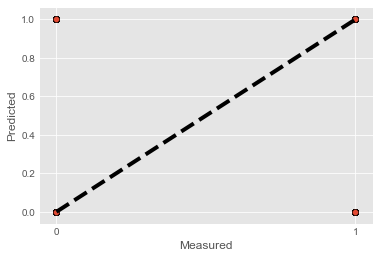

In [68]:
#Visualizing prediction errors

from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

predicted = cross_val_predict(logreg, X_train, y_train, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [69]:
# Method 1 - Building models with all features - RandomForest


#***********************************K fold cross validation with different values of K as 5 *******#

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

kfold = KFold(n_splits= 5, random_state= 123)
result = cross_val_score(RandomForestClassifier(max_features=10,max_depth=10),
                         X_train, y_train, cv=kfold, scoring='accuracy')

print("Accuracy:", result)
print("Mean Accuracy:", result.mean())
print("Median Accuracy:", np.median(result))

# The mean and median of accuracy on test is almost same indicating the model is not overfitting #

#*********************************** Fit a RandomForest model on full train data ****************#

rfmodel = RandomForestClassifier(max_features=10,max_depth=10)
model = rfmodel.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


train_pred=model.predict(X_train)
train_accu=accuracy_score(y_train,train_pred)
train_auc=roc_auc_score(y_train,train_pred)

print("Train Accuracy: ", train_accu)
print("Train AUC: ", train_auc)
print(classification_report(y_train,train_pred))

test_pred=model.predict(X_test)
test_accu=accuracy_score(y_test,test_pred)
test_auc=roc_auc_score(y_test,test_pred)
print("Test Accuracy: ",test_accu)
print("Test AUC: ", test_auc)
print(classification_report(y_test,test_pred))

# The performance on Test is not as good as Train. Clear case of overfitting. 
# The AUC has improved on test to over 0.7

Accuracy: [ 0.89231836  0.90045092  0.90357267  0.89646202  0.89923691]
Mean Accuracy: 0.898408174875
Median Accuracy: 0.899236906001
Train Accuracy:  0.916825639069
Train AUC:  0.664714904643
             precision    recall  f1-score   support

          0       0.92      0.99      0.95     25587
          1       0.81      0.34      0.48      3244

avg / total       0.91      0.92      0.90     28831

Test Accuracy:  0.898680909606
Test AUC:  0.6240875111
             precision    recall  f1-score   support

          0       0.91      0.98      0.94     10961
          1       0.62      0.27      0.38      1396

avg / total       0.88      0.90      0.88     12357



In [ ]:
# Method 1 - Building modesl with all features - SVM


#***********************************K fold cross validation with different values of K as 5 *******#

from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

kfold = KFold(n_splits= 5, random_state= 123)
svm = SVC(kernel='linear', C=10)
svm.fit(X_train, y_train)


result = cross_val_score(svm, X_train, y_train, cv=kfold, scoring='accuracy')

print("Accuracy:", result)
print("Mean Accuracy:", result.mean())
print("Median Accuracy:", np.median(result))

# The mean and median of accuracy on test is almost same indicating the model is not overfitting #

#*********************************** Fit a SVM model on full train data ****************#

model = svm.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


train_pred=model.predict(X_train)
train_accu=accuracy_score(y_train,train_pred)
train_auc=roc_auc_score(y_train,train_pred)

print("Train Accuracy: ", train_accu)
print("Train AUC: ", train_auc)
print(classification_report(y_train,train_pred))

test_pred=model.predict(X_test)
test_accu=accuracy_score(y_test,test_pred)
test_auc=roc_auc_score(y_test,test_pred)
print("Test Accuracy: ",test_accu)
print("Test AUC: ", test_auc)
print(classification_report(y_test,test_pred))

In [ ]:
## Method 2 

# Feature selection: 

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

d1=dict()
cols=X_train.columns.values.tolist()
imp=list(model.feature_importances_)
for i in range(len(cols)):
    d1[cols[i]]=imp[i]
d1.values.sort()

In [ ]:
selected_feat=[ 'lage', 'leuribor3m', 'lcampaign', 'poutcome_t', 'nr.employed', 'housing_t',
 'col1_Not Contacted', 'day_t', 'loan_t', 'emp.var.rate', 'default_t']

X_train1=X_train
X_train=X_train1[selected_feat]
X_test1=X_test
X_test=X_test1[selected_feat]


# Method 2 - Building model with selected features - RandomForest


#***********************************K fold cross validation with different values of K as 5 *******#

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

kfold = KFold(n_splits= 5, random_state= 123)
result = cross_val_score(RandomForestClassifier(max_features=8,max_depth=4),
                         X_train, y_train, cv=kfold, scoring='accuracy')

print("Accuracy:", result)
print("Mean Accuracy:", result.mean())
print("Median Accuracy:", np.median(result))

# The mean and median of accuracy on test is almost same indicating the model is not overfitting #

#*********************************** Fit a RandomForest model on full train data ****************#

rfmodel = RandomForestClassifier(max_features=8,max_depth=4)
model = rfmodel.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


train_pred=model.predict(X_train)
train_accu=accuracy_score(y_train,train_pred)
train_auc=roc_auc_score(y_train,train_pred)

print("Train Accuracy: ", train_accu)
print("Train AUC: ", train_auc)
print(classification_report(y_train,train_pred))

test_pred=model.predict(X_test)
test_accu=accuracy_score(y_test,test_pred)
test_auc=roc_auc_score(y_test,test_pred)
print("Test Accuracy: ",test_accu)
print("Test AUC: ", test_auc)
print(classification_report(y_test,test_pred))


# The model fits decently. AUC on train and test is best so far. Overall feature selection helped

In [ ]:
# Method 2 - Building model with selected features - Logistic


#***********************************K fold cross validation with different values of K as 5 *******#

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

kfold = KFold(n_splits= 5, random_state= 123)
result = cross_val_score(LogisticRegression(), X_train, y_train, cv=kfold, scoring='accuracy')

print("Accuracy:", result)
print("Mean Accuracy:", result.mean())
print("Median Accuracy:", np.median(result))

# The mean and median of accuracy on test is almost same indicating the model is not overfitting #

#*********************************** Fit a logistic model on full train data ****************#

logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


train_pred=model.predict(X_train)
train_accu=accuracy_score(y_train,train_pred)
train_auc=roc_auc_score(y_train,train_pred)

print("Train Accuracy: ", train_accu)
print("Train AUC: ", train_auc)
print(classification_report(y_train,train_pred))

test_pred=model.predict(X_test)
test_accu=accuracy_score(y_test,test_pred)
test_auc=roc_auc_score(y_test,test_pred)
print("Test Accuracy: ",test_accu)
print("Test AUC: ", test_auc)
print(classification_report(y_test,test_pred))


# The model fits decently. Model is stable. Feature selection did not result in a lot of loss of information as AUC 
# and accuracy are same as previous

In [ ]:
# Method 2 - Building model with selected features - SVM


#***********************************K fold cross validation with different values of K as 5 *******#

from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

kfold = KFold(n_splits= 5, random_state= 123)
svm = SVC(kernel='linear', C=10)
result = cross_val_score(svm, X_train, y_train, cv=kfold, scoring='accuracy')

print("Accuracy:", result)
print("Mean Accuracy:", result.mean())
print("Median Accuracy:", np.median(result))

# The mean and median of accuracy on test is almost same indicating the model is not overfitting #

#*********************************** Fit a SVM model on full train data ****************#

model = svm.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


train_pred=model.predict(X_train)
train_accu=accuracy_score(y_train,train_pred)
train_auc=roc_auc_score(y_train,train_pred)

print("Train Accuracy: ", train_accu)
print("Train AUC: ", train_auc)
print(classification_report(y_train,train_pred))

test_pred=model.predict(X_test)
test_accu=accuracy_score(y_test,test_pred)
test_auc=roc_auc_score(y_test,test_pred)
print("Test Accuracy: ",test_accu)
print("Test AUC: ", test_auc)
print(classification_report(y_test,test_pred))

In [ ]:
# Method 3: Taking care of class imbalance

train_3=pd.concat([X_train,y_train],axis=1)
p1=train_3[train_3.label==1]
p2=train_3[train_3.label==0].sample(len(p1.label))
train_temp=pd.concat([p1,p2])

X_train=train_temp.drop(["label"],axis=1)
y_train=train_temp['label']

In [ ]:
# Method 3 - Building model with selected features and after addressing class imbalance - RandomForest


#***********************************K fold cross validation with different values of K as 5 *******#

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

kfold = KFold(n_splits= 5, random_state= 123)
result = cross_val_score(RandomForestClassifier(max_features=8,max_depth=4),
                         X_train, y_train, cv=kfold, scoring='accuracy')

print("Accuracy:", result)
print("Mean Accuracy:", result.mean())
print("Median Accuracy:", np.median(result))

# The mean and median of accuracy on test is almost same indicating the model is not overfitting #

#*********************************** Fit a RandomForest model on full train data ****************#

rfmodel = RandomForestClassifier(max_features=8,max_depth=4)
model = rfmodel.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


train_pred=model.predict(X_train)
train_accu=accuracy_score(y_train,train_pred)
train_auc=roc_auc_score(y_train,train_pred)

print("Train Accuracy: ", train_accu)
print("Train AUC: ", train_auc)
print(classification_report(y_train,train_pred))

test_pred=model.predict(X_test)
test_accu=accuracy_score(y_test,test_pred)
test_auc=roc_auc_score(y_test,test_pred)
print("Test Accuracy: ",test_accu)
print("Test AUC: ", test_auc)
print(classification_report(y_test,test_pred))


# Clearly addressing class imbalance improves the auc much better

In [ ]:
# Method 3 - Building model with selected features and after addressing class imbalance - Logistic


#***********************************K fold cross validation with different values of K as 5 *******#

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

kfold = KFold(n_splits= 5, random_state= 123)
result = cross_val_score(LogisticRegression(), X_train, y_train, cv=kfold, scoring='accuracy')

print("Accuracy:", result)
print("Mean Accuracy:", result.mean())
print("Median Accuracy:", np.median(result))

# The mean and median of accuracy on test is almost same indicating the model is not overfitting #

#*********************************** Fit a logistic model on full train data ****************#

logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


train_pred=model.predict(X_train)
train_accu=accuracy_score(y_train,train_pred)
train_auc=roc_auc_score(y_train,train_pred)

print("Train Accuracy: ", train_accu)
print("Train AUC: ", train_auc)
print(classification_report(y_train,train_pred))

test_pred=model.predict(X_test)
test_accu=accuracy_score(y_test,test_pred)
test_auc=roc_auc_score(y_test,test_pred)
print("Test Accuracy: ",test_accu)
print("Test AUC: ", test_auc)
print(classification_report(y_test,test_pred))


# The logistic model performs much better after feature selection and addressing class imbalance

In [ ]:
# Method 3 - Building model with selected features and after addressing class imbalance - SVM


#***********************************K fold cross validation with different values of K as 5 *******#

from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

kfold = KFold(n_splits= 5, random_state= 123)
svm = SVC(kernel='linear', C=10)
result = cross_val_score(svm, X_train, y_train, cv=kfold, scoring='accuracy')

print("Accuracy:", result)
print("Mean Accuracy:", result.mean())
print("Median Accuracy:", np.median(result))

# The mean and median of accuracy on test is almost same indicating the model is not overfitting #

#*********************************** Fit a SVM model on full train data ****************#

model = svm.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


train_pred=model.predict(X_train)
train_accu=accuracy_score(y_train,train_pred)
train_auc=roc_auc_score(y_train,train_pred)

print("Train Accuracy: ", train_accu)
print("Train AUC: ", train_auc)
print(classification_report(y_train,train_pred))

test_pred=model.predict(X_test)
test_accu=accuracy_score(y_test,test_pred)
test_auc=roc_auc_score(y_test,test_pred)
print("Test Accuracy: ",test_accu)
print("Test AUC: ", test_auc)
print(classification_report(y_test,test_pred))

# Findings
---
 - While method 1 and method 2 give good accuracy estimates, the AUC for both methods is not statisfactory
 - Method 3 is the best method for this problem. Doing feature selection and addressing class imbalance improves model predictions significanlty
 - While the Moro paper emphasizes on the importance of a data mining approch to solve telemarketing problem. We recommend data mining approach with appropriate feature engineering, selection and sampling.
 - Accuracy is much better than what is reported in Moro's paper

# Business findings
- Important features: ['lduration', 'lage', 'leuribor3m', 'lcampaign', 'poutcome_t', 'nr.employed', 'housing_t',
 'col1_Not Contacted', 'day_t', 'loan_t', 'emp.var.rate', 'default_t']
 